In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [2]:
df=pd.read_csv('Donald-Tweets!.csv')

In [3]:
df = df.rename(columns={ 'twt_favourites_IS_THIS_LIKE_QUESTION_MARK': 'Favourites'})

In [4]:
#without data cleaning raw data 
print(df.shape)

(7375, 12)


In [5]:
df.head()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Tweet_Url,Favourites,Retweets,Unnamed: 10,Unnamed: 11
0,16-11-11,15:26:37,Today we express our deepest gratitude to all ...,text,photo,ThankAVet,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,127213,41112,NaN,NaN
1,16-11-11,13:33:35,Busy day planned in New York. Will soon be mak...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,141527,28654,NaN,NaN
2,16-11-11,11:14:20,Love the fact that the small groups of protest...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/797...,183729,50039,NaN,NaN
3,16-11-11,2:19:44,Just had a very open and successful presidenti...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,214001,67010,NaN,NaN
4,16-11-11,2:10:46,A fantastic day in D.C. Met with President Oba...,text,NaN,NaN,7.970000e+17,https://twitter.com/realDonaldTrump/status/796...,178499,36688,NaN,NaN


In [6]:
df['Type'].value_counts()

text     6448
link      925
video       2
Name: Type, dtype: int64

In [7]:
df['Media_Type'].value_counts()

photo    1225
Name: Media_Type, dtype: int64

In [8]:
df.describe()

,Tweet_Id,Favourites,Retweets,Unnamed: 10,Unnamed: 11
count,7.375000e+03,7375.000000,7375.000000,2.600000e+01,1.300000e+01
mean,6.973543e+17,11134.300881,4290.325424,1.008971e+09,6.545385e+17
std,5.129039e+16,17091.770663,7263.061158,1.328810e+09,3.386398e+16
min,6.210000e+17,0.000000,83.000000,1.429331e+07,6.380000e+17
25%,6.560000e+17,2225.000000,969.000000,5.422870e+07,6.460000e+17
50%,6.900000e+17,5606.000000,2173.000000,2.318388e+08,6.460000e+17
75%,7.380000e+17,15337.500000,5537.500000,2.169692e+09,6.460000e+17
max,7.970000e+17,627615.000000,352603.000000,3.412873e+09,7.670000e+17


In [9]:
df.dtypes

Date            object
Time            object
Tweet_Text      object
Type            object
Media_Type      object
Hashtags        object
Tweet_Id       float64
Tweet_Url       object
Favourites       int64
Retweets         int64
Unnamed: 10    float64
Unnamed: 11    float64
dtype: object

In [10]:
df.isnull().sum()

Date              0
Time              0
Tweet_Text        0
Type              0
Media_Type     6150
Hashtags       5344
Tweet_Id          0
Tweet_Url         0
Favourites        0
Retweets          0
Unnamed: 10    7349
Unnamed: 11    7362
dtype: int64

In [11]:
tweets = df.loc[:, ['Date', 'Time','Tweet_Text','Type','Media_Type','Hashtags','Tweet_Id','Favourites','Retweets']]

In [12]:
tweets['Hashtags']=tweets['Hashtags'].replace(np.nan,'',regex=True)
tweets['Media_Type']=tweets['Media_Type'].replace(np.nan,'',regex=True)

In [13]:
tweets.tail()

,Date,Time,Tweet_Text,Type,Media_Type,Hashtags,Tweet_Id,Favourites,Retweets
7370,15-07-16,13:10:00,I loved firing goofball atheist Penn @pennjill...,text,,,6.220000e+17,953,431
7371,15-07-16,10:18:31,I hear @pennjillette show on Broadway is terri...,text,,,6.220000e+17,1175,1086
7372,15-07-16,10:10:17,Irrelevant clown @KarlRove sweats and shakes n...,text,,,6.220000e+17,1494,930
7373,15-07-16,9:44:07,"""@HoustonWelder: Donald Trump is one of the se...",text,,,6.220000e+17,1800,1738
7374,15-07-16,0:21:25,RT @marklevinshow: Trump: Rove is a clown and ...,link,,,6.210000e+17,962,689


In [14]:
tweets= tweets.dropna()

In [15]:
print(tweets.shape)

(7375, 9)


This will be the Dataset i will working with. I removed certain variables (Tweet_Url, Unnamed:10, Unnamed: 11)

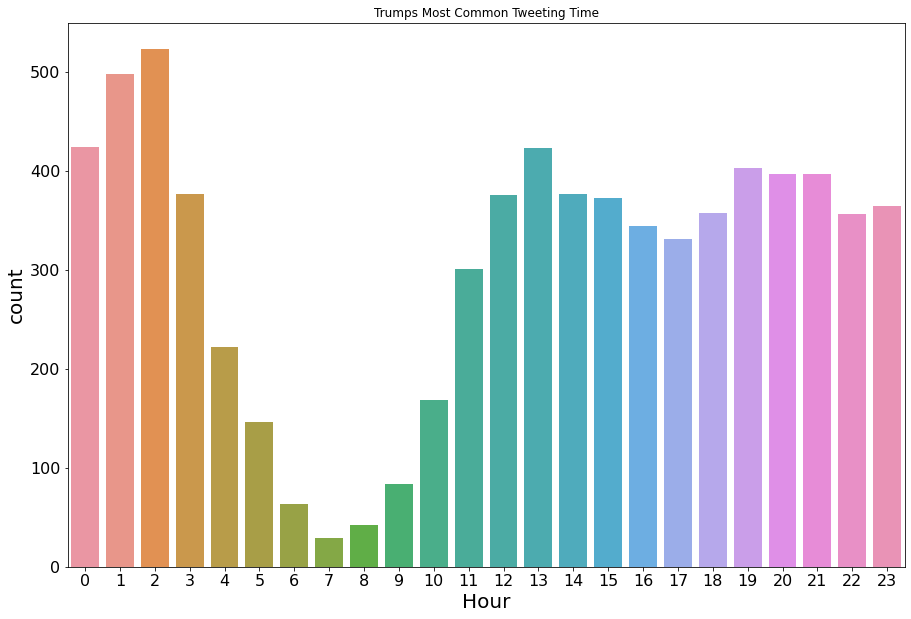

In [16]:
hours = []
for value in tweets['Time'].values:
    hours.append(int(value.split(':')[0]))
    
tweets['Hour'] = pd.DataFrame(hours)
plt.figure(figsize=(15,10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Hour", fontsize=20)
plt.ylabel("Number of Tweets", fontsize=20)
plt.title("Trumps Most Common Tweeting Time")
sb.countplot(x='Hour', data=tweets, order=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.show()

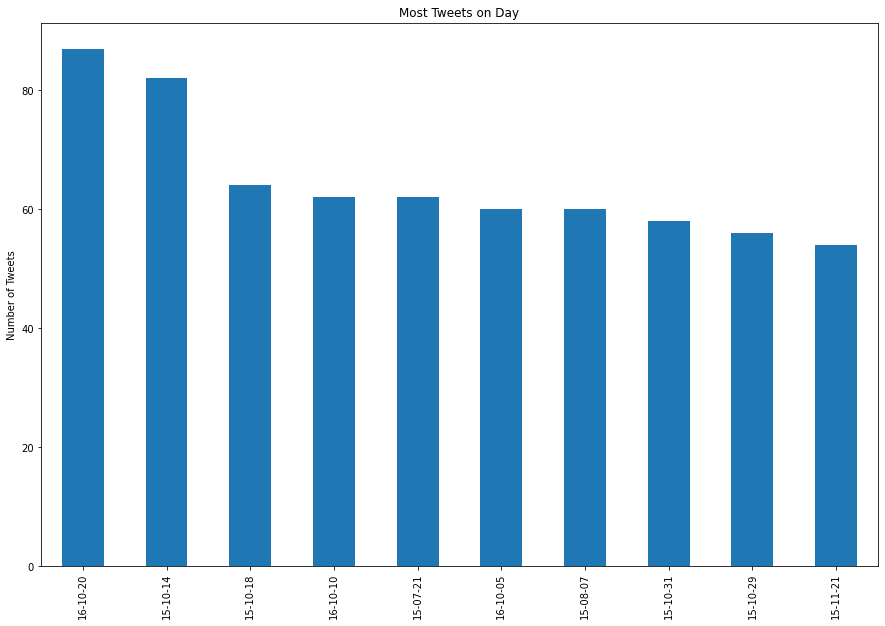

In [17]:
plt.figure(figsize=(15,10))
plt.ylabel("Number of Tweets")
plt.title("Most Tweets on Day")
tweets['Date'].value_counts().nlargest(10).plot.bar()
plt.show()

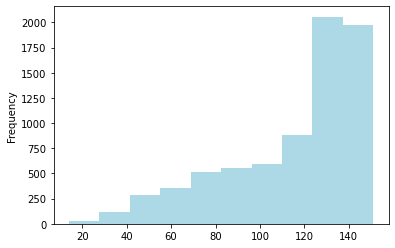

In [18]:
length_tweets = tweets['Tweet_Text'].str.len().plot.hist(color = 'lightblue', figsize = (6, 4))
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

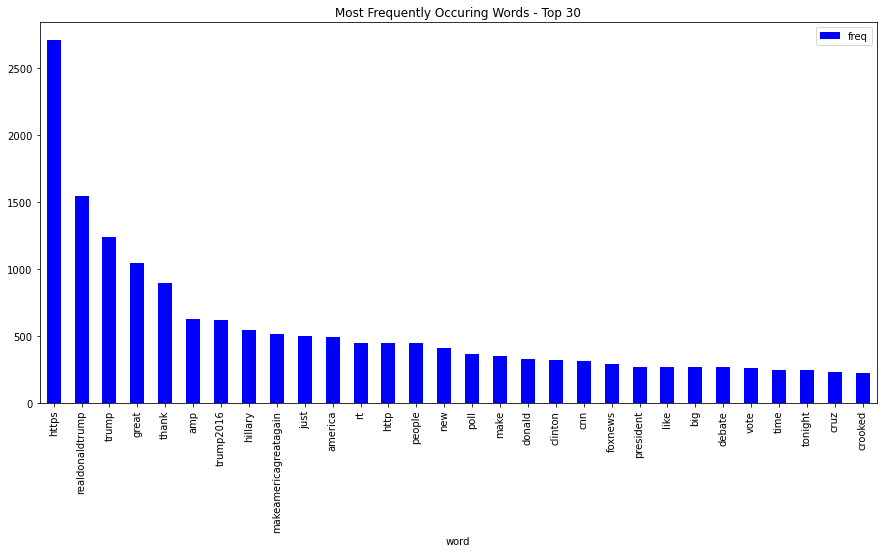

In [19]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tweets.Tweet_Text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

It seems that many twitter posts contain a lot of url's.

<function matplotlib.pyplot.show(close=None, block=None)>

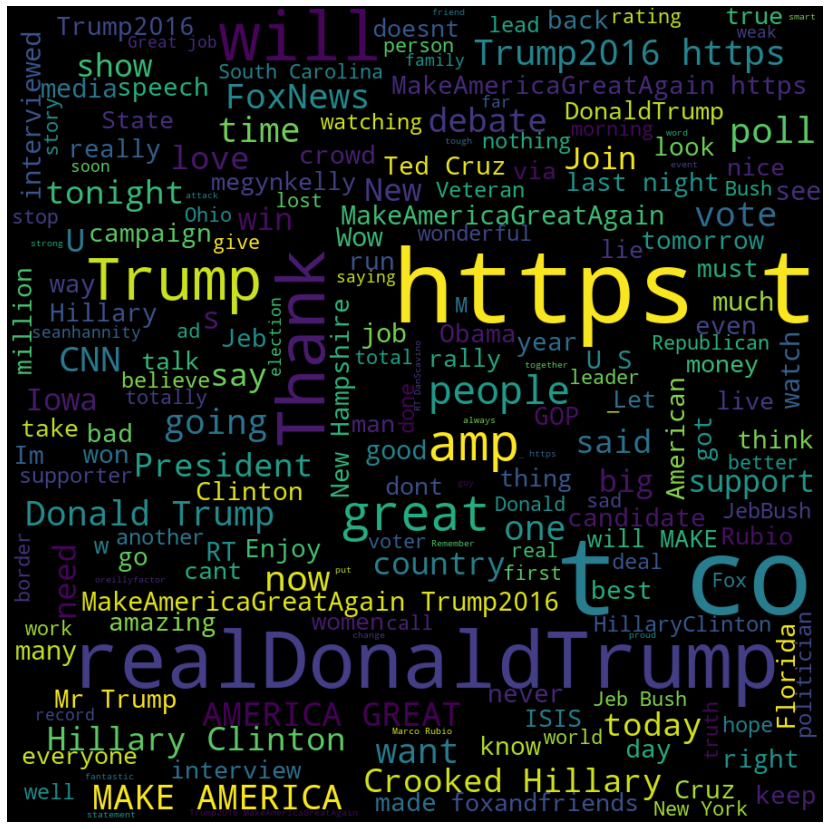

In [20]:
#Wordcloud--> just a different way to show the most occuring words
allWords= ' '.join([twts for twts in tweets['Tweet_Text']])
wordCloud= WordCloud(width= 900, height= 900, random_state=21,max_font_size=119).generate(allWords)
plt.figure(figsize=(15,15))
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

For the next word cloud, i will remove links, hashtags and @usernames (mentions)

In [21]:
text = tweets['Tweet_Text'].to_numpy()

for i in range(len(text)):
    text[i] = " ".join(filter(lambda x:x[0]!='@', text[i].split()))
    text[i] = " ".join(filter(lambda x:x[0]!='#', text[i].split()))
    text[i] = " ".join(filter(lambda x:x[0:4]!='http', text[i].split()))
    
    

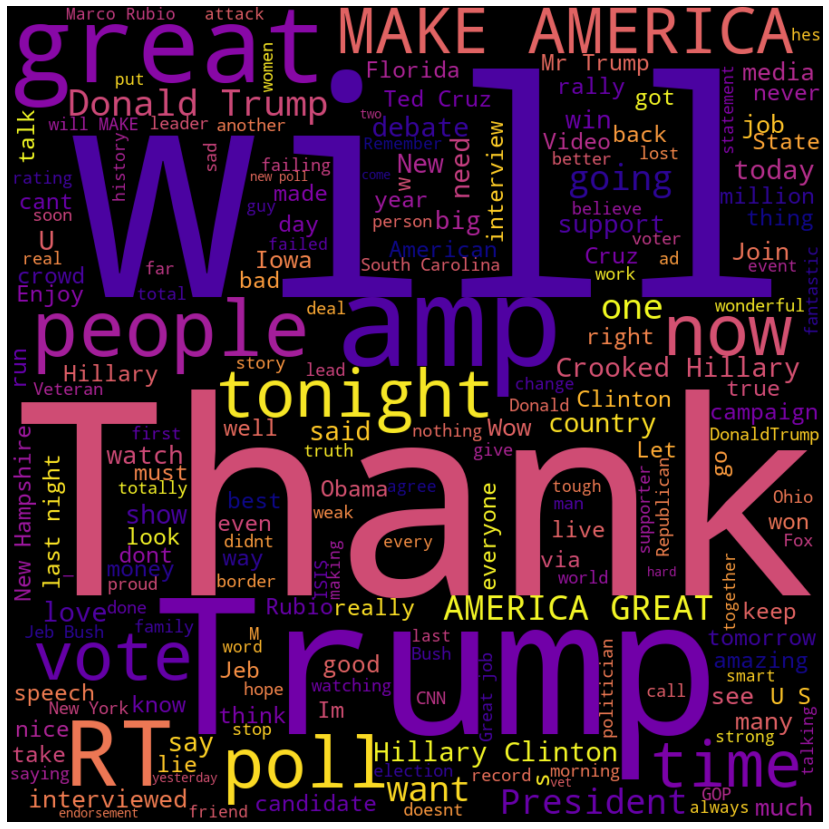

In [22]:
wordcloud = WordCloud(width=900, height=900,colormap='plasma').generate(' '.join(text))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Hashtags which are used in the tweets 

In [23]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

Text(0.5, 1.0, 'Most Frequently Occuring Hashtags - Top 30')

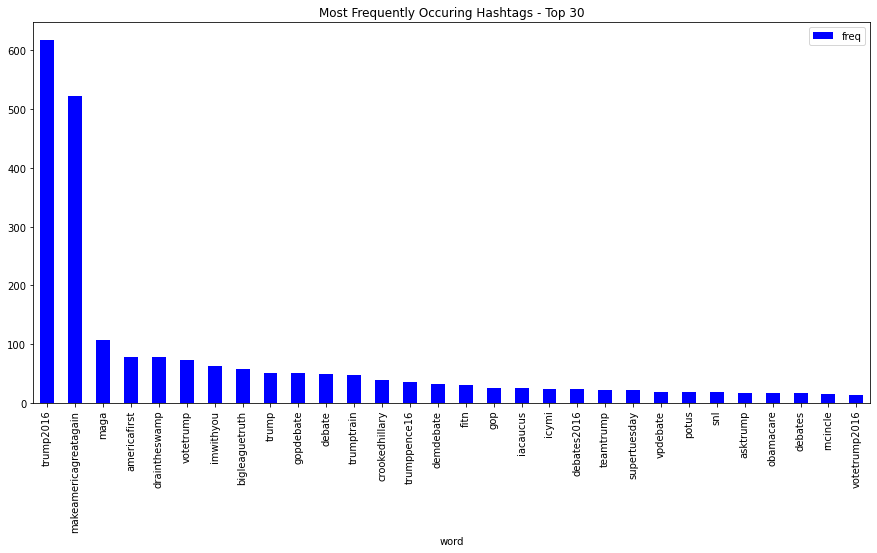

In [24]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tweets.Hashtags)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Hashtags - Top 30")

Variable: type

<AxesSubplot:xlabel='Type', ylabel='count'>

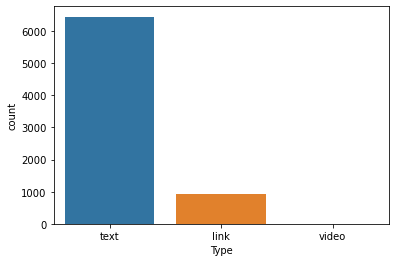

In [25]:
sb.countplot(x='Type', data=tweets)

In [26]:
#media typ
tweets['Media_Type'].value_counts()

         6150
photo    1225
Name: Media_Type, dtype: int64

The variable Hashtag

In [27]:
tweets['Hashtags'].value_counts()

                                                       5344
Trump2016                                               219
MakeAmericaGreatAgain                                   190
MakeAmericaGreatAgain;Trump2016                         128
MAGA                                                     45
                                                       ... 
MSPrimary                                                 1
HarveyPitt                                                1
SuperTuesday;MakeAmericaGreatAgain                        1
TrumpPence16;MakeAmericaGreatAgain                        1
WeAreBernie;WeWantTrump;makeamericagreatagain;trump       1
Name: Hashtags, Length: 792, dtype: int64

It looks like the hashtags listed in the tweet are displayed separately

In [28]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

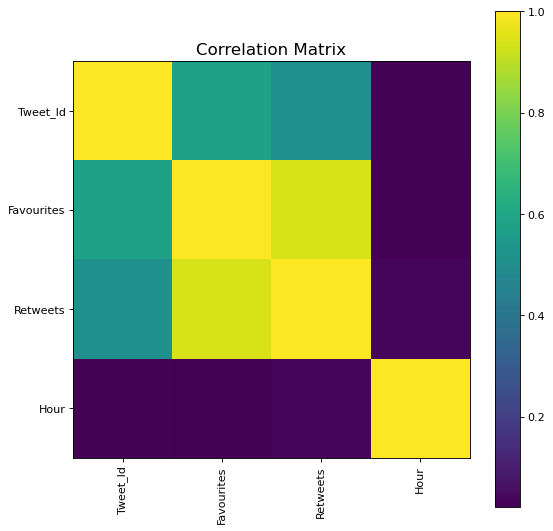

In [30]:
plotCorrelationMatrix(tweets, 8)

In [31]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

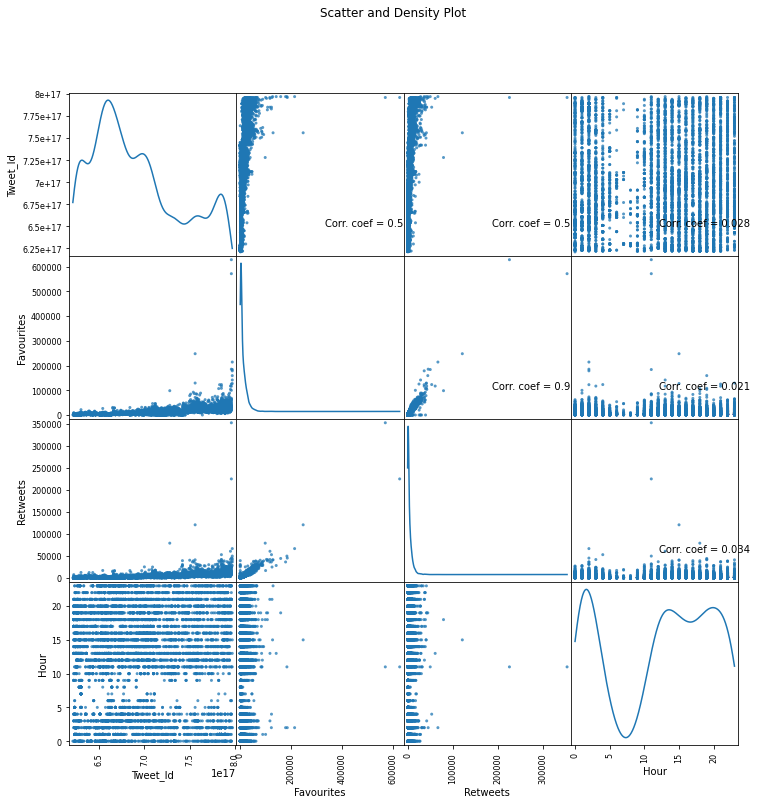

In [32]:
plotScatterMatrix(tweets, 12, 10)